In [1]:
# Import the data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m14/datasets/bank_marketing.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,83,retired,divorced,primary,no,0,no,no,telephone,31,may,664,1,77.0,3,success,no
1,32,technician,married,secondary,no,1242,yes,no,NaN,2,jun,183,3,NaN,0,NaN,no
2,38,blue-collar,single,secondary,no,68,no,no,NaN,5,jun,90,2,NaN,0,NaN,no
3,30,services,single,secondary,no,677,yes,no,cellular,21,nov,108,1,NaN,0,NaN,no
4,66,retired,married,primary,no,2173,no,no,cellular,15,jul,178,1,181.0,5,failure,no


In [2]:
# Drop rows with null values
df_clean = df.dropna().copy()

# Convert y to numeric
df_clean['y'] = pd.get_dummies(df_clean['y'], drop_first = True, dtype=int)

# Drop all non-numeric columns
df_clean = df_clean.select_dtypes(include='number')

# Verify changes with the info method
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5897 entries, 0 to 33904
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       5897 non-null   int64  
 1   balance   5897 non-null   int64  
 2   day       5897 non-null   int64  
 3   duration  5897 non-null   int64  
 4   campaign  5897 non-null   int64  
 5   pdays     5897 non-null   float64
 6   previous  5897 non-null   int64  
 7   y         5897 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 414.6 KB


In [3]:
# Setup X and y variables
X = df_clean.drop(columns='y')
y = df_clean['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

In [4]:
# Create and train a random forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
# Check the model's balanced accuracy on the test set

y_pred = model.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.6968510298788586


In [6]:
# Check the model's balanced accuracy on the training set

y_train_pred = model.predict(X_train)
print(balanced_accuracy_score(y_train, y_train_pred))

1.0


In [7]:
# Try the following values for max_depth

max_depths = range(1, 10)
models = {'train_score': [], 'test_score': [], 'max_depth': []}

# Loop through each value in max_depths
for depth in max_depths:
    clf = RandomForestClassifier(max_depth = depth)
    clf.fit(X_train, y_train)

    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_score = balanced_accuracy_score(y_train, train_pred)
    test_score = balanced_accuracy_score(y_test, test_pred)

    models['train_score'].append(train_score)
    models['test_score'].append(test_score)
    models['max_depth'].append(depth)

# Create a dataframe from the models dictionary with max_depth as the index
models_df = pd.DataFrame(models).set_index('max_depth')


<Axes: xlabel='max_depth'>

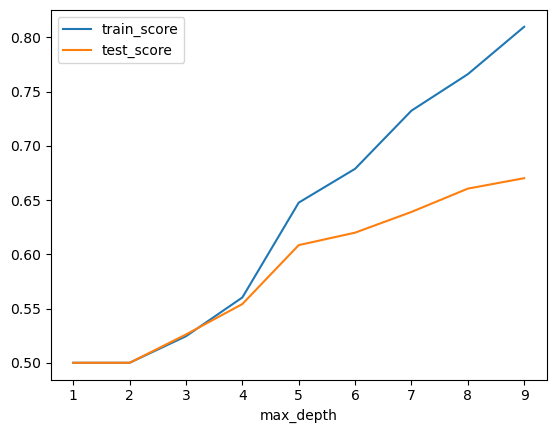

In [8]:
# Plot the results
models_df.plot()

In [9]:
clf = RandomForestClassifier(max_depth=5)
clf.fit(X_train, y_train) 

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

print(balanced_accuracy_score(y_train, train_pred))
print(balanced_accuracy_score(y_test, test_pred))


0.6114377977873771
0.5793516737109472
